In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.read_csv("/content/diabetes.csv")
print("Ukuran dataset:", df.shape)
df.head()

Ukuran dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()
print("\nJumlah nilai kosong tiap kolom:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Jumlah nilai kosong tiap kolom:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction  

In [3]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

print("Jumlah fitur:", X.shape[1])
print("Jumlah sampel:", X.shape[0])

Jumlah fitur: 8
Jumlah sampel: 768


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, " | Test:", X_test.shape)

Train: (614, 8)  | Test: (154, 8)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

=== Classification Report - SVC ===
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



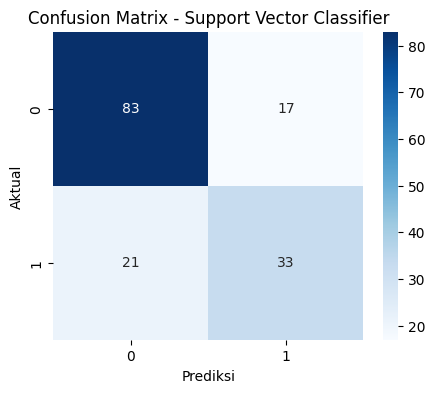

In [6]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)

# Prediksi
y_pred_svc = svc.predict(X_test_scaled)

# Evaluasi
print("=== Classification Report - SVC ===")
print(classification_report(y_test, y_pred_svc))

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(5,4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

=== Classification Report - Random Forest ===
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



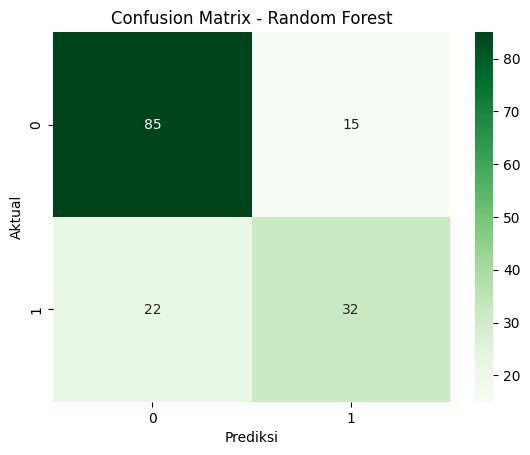

In [7]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Classification Report - Random Forest ===")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

=== Classification Report - KNN ===
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



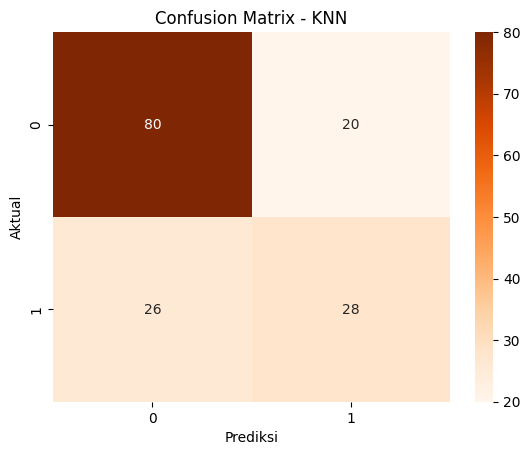

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("=== Classification Report - KNN ===")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

=== Classification Report - GaussianNB ===
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154



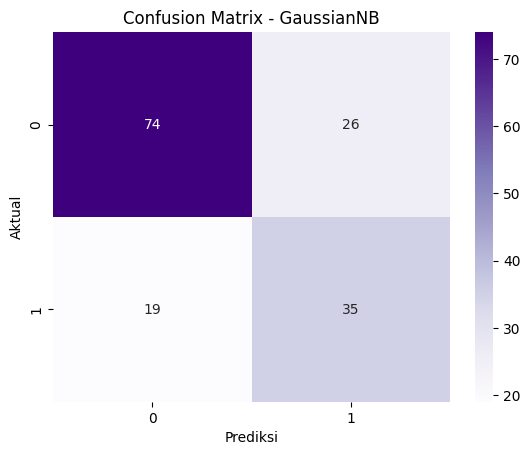

In [9]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("=== Classification Report - GaussianNB ===")
print(classification_report(y_test, y_pred_gnb))

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - GaussianNB")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

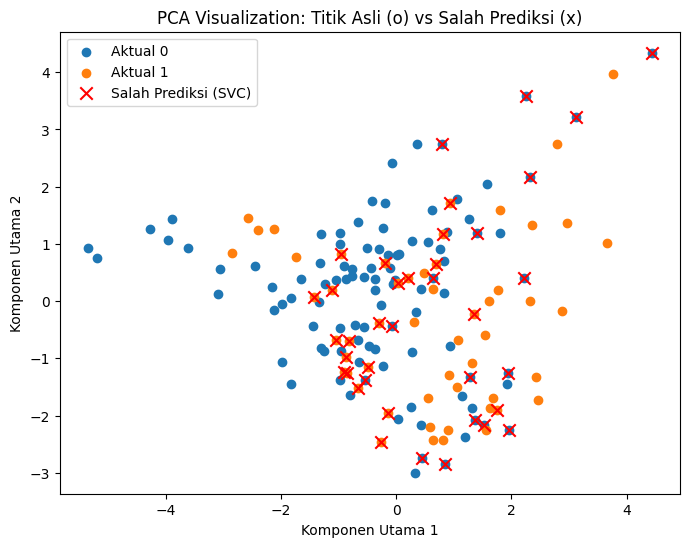

In [11]:
pca = PCA(n_components=2, random_state=42)
X_test_2d = pca.fit_transform(X_test_scaled)

plt.figure(figsize=(8,6))
for label in np.unique(y_test):
    idx = np.where(y_test == label)
    plt.scatter(X_test_2d[idx,0], X_test_2d[idx,1], label=f"Aktual {label}", marker='o')

mis_idx = np.where(y_test != y_pred_svc)
plt.scatter(X_test_2d[mis_idx,0], X_test_2d[mis_idx,1], color='red', marker='x', s=80, label='Salah Prediksi (SVC)')

plt.title("PCA Visualization: Titik Asli (o) vs Salah Prediksi (x)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend()
plt.show()

Laporan Implementasi Supervised Learning (Klasifikasi Diabetes)
1. Import Library

Tahap awal dilakukan import beberapa library penting seperti pandas, numpy, matplotlib, seaborn, dan sklearn.
Library ini digunakan untuk pengolahan data, visualisasi, dan penerapan model machine learning.
() pandas untuk membaca dan mengolah data,
() matplotlib serta seaborn untuk membuat grafik,
(*) sklearn untuk menerapkan model klasifikasi dan evaluasi.

2. Load Dataset

Dataset yang digunakan adalah Pima Indians Diabetes Dataset dari sklearn.datasets atau file CSV.
Dataset ini berisi data medis seperti jumlah kehamilan, kadar glukosa, tekanan darah, ketebalan kulit, kadar insulin, BMI, riwayat diabetes keluarga, dan usia pasien.
(*) Kolom Outcome menjadi label dengan nilai 0 (tidak diabetes) dan 1 (diabetes).

3. Eksplorasi Data

Data diperiksa dengan fungsi df.info(), df.describe(), dan df.isnull().sum() untuk memastikan tidak ada missing value.
Selain itu dilakukan juga cek distribusi label agar tahu apakah data seimbang.
(*) Dari hasil eksplorasi, dataset tidak memiliki nilai kosong dan siap digunakan.

4. Pemisahan Fitur dan Label

Langkah selanjutnya adalah memisahkan fitur (X) dan label (y):
() X berisi seluruh kolom kecuali Outcome,
() y berisi kolom Outcome saja.
Tujuan pemisahan ini agar model dapat belajar hubungan antara variabel input (fitur) dan output (label).

5. Split Data Training dan Testing

Data dibagi menjadi dua bagian menggunakan train_test_split:
(*) 80% data untuk training dan 20% untuk testing.
Pembagian ini memastikan model dapat diuji dengan data baru yang belum pernah dilihat sebelumnya.

6. Standarisasi Data

Data fitur kemudian dinormalisasi menggunakan StandardScaler.
Langkah ini penting agar semua fitur berada dalam skala yang sama, terutama untuk model seperti SVM dan KNN yang sensitif terhadap skala nilai.
(*) Proses ini membuat model lebih stabil dan akurat saat belajar.

7. Training Model

Empat model klasifikasi dilatih menggunakan data training, yaitu:

(*) Support Vector Classifier (SVC): mencari garis pemisah terbaik antara dua kelas.

(*) Random Forest: membentuk banyak pohon keputusan dan mengambil hasil voting.

(*) K-Nearest Neighbors (KNN): mengklasifikasi berdasarkan tetangga terdekat.

(*) Gaussian Naive Bayes (GNB): menghitung probabilitas dengan asumsi distribusi data normal.

Semua model di-fit menggunakan model.fit(X_train, y_train).

8. Evaluasi Model

Setiap model dievaluasi dengan akurasi, confusion matrix, dan classification report.
(*) Evaluasi dilakukan dengan data testing untuk melihat kemampuan model mengenali pola baru.
Hasil umumnya menunjukkan bahwa Random Forest dan SVC memiliki akurasi tertinggi.

9. Visualisasi PCA

Untuk memvisualisasikan hasil klasifikasi, digunakan Principal Component Analysis (PCA) untuk menurunkan dimensi data menjadi dua komponen utama.
Plot scatter ditampilkan dengan warna berbeda untuk setiap kelas (0 dan 1).
(*) Tujuannya agar pola pemisahan antar kelas terlihat secara visual.